In [153]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [154]:
quebec = pd.read_csv('C:\\Users\\Андрей Клычев\\временные ряды\\monthly-car-sales-in-quebec-1960.csv')

series_q = quebec.Count

In [155]:
def test_st(series):
    print('Результат теста Дики-Фуллера:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['результат Т-теста:', "Дов. интервал:", "Величина лага:", "Кол-во наблюдений:"])
    for key, value in dftest[4].items():
        print(f'Критическое значение {key}: ', value)
    print(dfoutput)

In [156]:
def tsplot(series, style='bmh'):
    test_st(series)
    
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
        
    with plt.style.context(style):
        plt.figure()
        layout = (4, 1)
        
        timeseries_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        autocorfunc_ax = plt.subplot2grid(layout, (2, 0))
        partialautocorfunc_ax = plt.subplot2grid(layout, (3, 0))
        
        series.plot(ax = timeseries_ax)
        
        timeseries_ax.set_title('Временной ряд')
        
        series.plot(ax=timeseries_ax, color='blue', label='Or')
        
        smt.graphics.plot_acf(series, ax=autocorfunc_ax, alpha=0.05)
        smt.graphics.plot_pacf(series, ax=partialautocorfunc_ax, alpha=0.05)
        
        plt.tight_layout()

In [157]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 7]

from statsmodels.tsa.statespace.sarimax import SARIMAX

Результат теста Дики-Фуллера:
Критическое значение 1%:  -3.492995948509562
Критическое значение 5%:  -2.888954648057252
Критическое значение 10%:  -2.58139291903223
результат Т-теста:   -8.307311e+00
Дов. интервал:        3.872355e-13
Величина лага:        0.000000e+00
Кол-во наблюдений:    1.070000e+02
dtype: float64


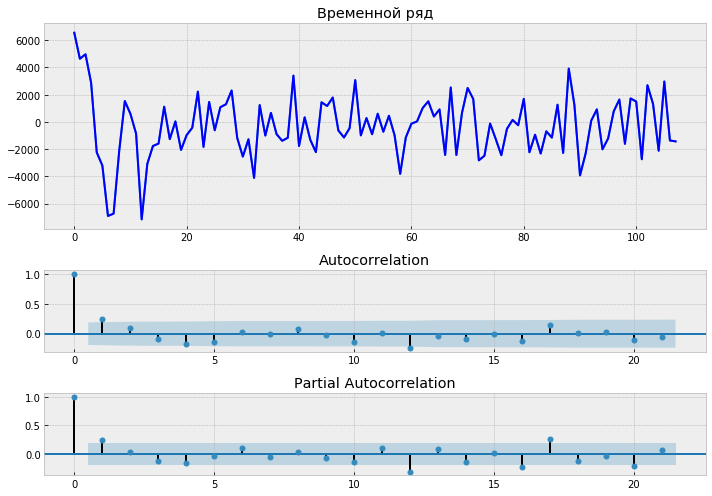

In [158]:
auc = SARIMAX(series_q, order=(2, 1, 1), seasonal_order=(2, 1, 1, 4)).fit()
tsplot(auc.resid)

In [159]:
quebec = pd.read_csv('C:\\Users\\Андрей Клычев\\временные ряды\\monthly-car-sales-in-quebec-1960.csv')

series_q = quebec.Count

In [160]:
n = len(series_q)


a = 0.5
b = 0.2
c = 0.5
def ARIMA():
    ar = []
    for _ in range(1, len(series_q)):
        ar.append(a*series_q[_-1] + b*series_q[_] + c*noise[_] + noise[_])
    arn = []
    for i in range(len(ar)):
        arn.append(np.diff(ar[:i], n=1))
    
    return arn[-1]

def ARMA2(series, coefs=[1, 1, 1, 1, 1], state=2):
    noise = np.random.normal(size=len(series))
    ar = []
    ar.extend((a1*series[0], a2*series[1]))
    for _ in range(state, len(series)):
        ar.append(coefs[0]*series[_-2] + coefs[1]*series[_-2] + coefs[2]*series[_-2] + coefs[3]*series[_-2] + coefs[4]*noise[_])

    return ar

In [161]:
    
ad = []
ai = []
min_AIC = np.inf

seq = [0.2, 0.4, 0.6, 0.8, 1]

for a1 in seq:
    for a2 in seq:
        for b1 in seq:
            for b2 in seq:
                for c in seq:
                    coefs=(a1, a2, b1, b2, c)
    #                     mse_e = mse(ARMA2(series_q, coefs), series_q)

                    AIC = 2*len(series_q) - 2*np.log(sum(np.subtract(ARMA2(series_q, coefs), series_q)))

                    if AIC < min_AIC:
                        min_AIC = AIC
                        best_order = (a1, a2, b1, b2, c)
    #                     print(AIC, (a1, a2, b1, b2, c))

                    ad.append((AIC))
                    ai.append((a1, a2, b1, b2, c))

In [162]:
ad[10:].index(min(ad[10:]))
ai[3113]

(1, 1, 1, 0.6, 0.8)

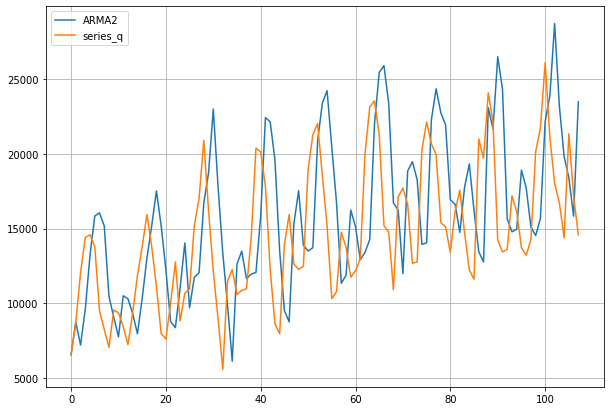

In [163]:
coefs = (0.2, 0.2, 0.2, 0.5, 0.5)
plt.plot(ARMA2(series_q, coefs=coefs), label='ARMA2')
# plt.plot(ARMA2`(preds, coefs=coefs)
plt.plot(series_q, label='series_q')
plt.legend()
plt.grid()

In [164]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            for s in range(5):
                try:
                    tmp_mdl = SARIMAX(series_q, order=(i,d,j), seasonal_order=(i,d,j, s)).fit()
                    tmp_aic = tmp_mdl.aic

                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j, s)
                        best_mdl = tmp_mdl

#                     print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
                except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


# tsplot(best_mdl.resid)

aic: 1865.96573 | order: (2, 1, 1, 4)


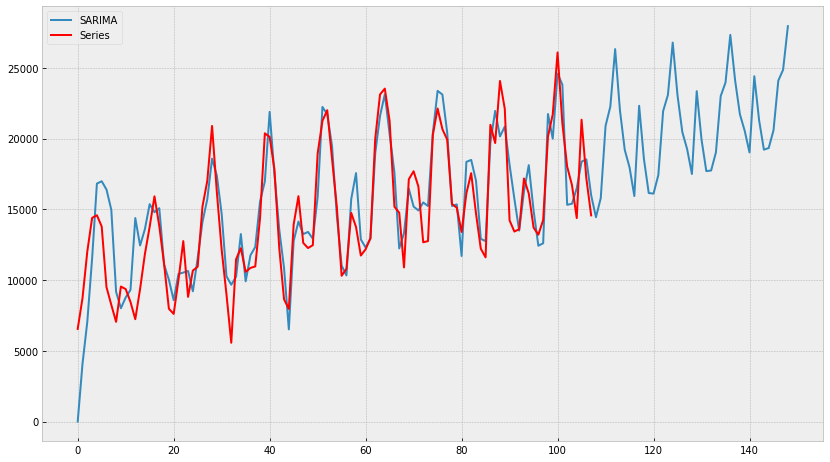

In [165]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(auc.predict(0, len(series_q)+40, ax=ax), label='SARIMA')

    plt.plot(series_q, color='red', label='Series')
    plt.legend()
    plt.show()

In [30]:
from arch import arch_model

In [128]:
predictions = []

for _ in range(1, 108):
    test_size = 107
    train = series_q[:-(test_size-_)].values
    model = arch_model(train, p=2, q=2)
    
#     test_ = series_q[int(len(series_q)*0.8):]
    
#     preds = model.fit(disp='off').forecast(horizon=1, params=)

#     predictions.append(preds.mean.values.mean())
#     print(train)

In [129]:
# 1. Скользящее среднее
def rolling_mean(series, n):
    dotes = []
    for _ in range(len(series)):
        try:
            
            dotes.append(series.loc[_:_+(n-1)].values.mean())
        except:
            pass
    return dotes

mn = rolling_mean(series_q, 25)

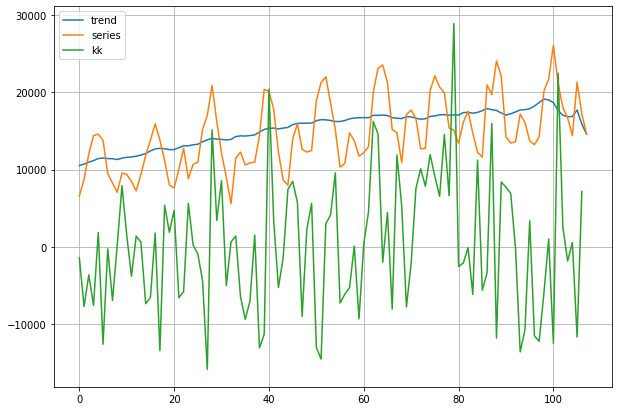

In [179]:
plt.plot(mn, label='trend')
plt.plot(series_q, label='series')
plt.plot(kk, label='kk')
plt.grid()
plt.legend()
plt.show()

In [184]:
# Высчитываем дисперсию:
disp = [abs(series_q[i] - mn[i]) for i in range(len(series_q))][:-1]
omega = np.random.normal(size=107)

In [209]:

a0 = 0.5
a1 = 0.3
b1 = 0.5

def GARCH(a0, a1, b1):
    kk = []
    for _ in range(1, 107):
        kk.append(omega[_]*np.sqrt(a0 + a1*series_q[_-1]**2 + b1*disp[_-1]))
    return kk

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [198]:
model = LinearRegression()
# Подготовим анные для обучения:
# eps_t**2 = a_0*omega_t**2 + a_1*eps_t-1**2*omega_t**2 + b_1*disp_t-1 * w_t**2

eps_t = np.array([t**2 for t in series_q][1:])
omega_t = np.array([t**2 for t in omega])

eps_t_1 = np.array([t**2 for t in series_q][:-1]) * omega_t

disp = np.array(disp) * omega_t

data = np.c_[omega_t, eps_t_1, disp]

train = data[:int(len(data)*0.8)]

test = data[int(len(data)*0.8):]

y_train = eps_t[:int(len(data)*0.8)]

y_test = eps_t[int(len(data)*0.8):]

In [199]:
model.fit(train, y_train)

LinearRegression()

In [201]:
pred = model.predict(test)
mse(pred, y_test)

3.0235006857258024e+16

In [204]:
print(model.coef_)
print(model.intercept_)

[-2.29084597e+07  1.73999515e-01 -1.00608251e-03]
192980998.00712657


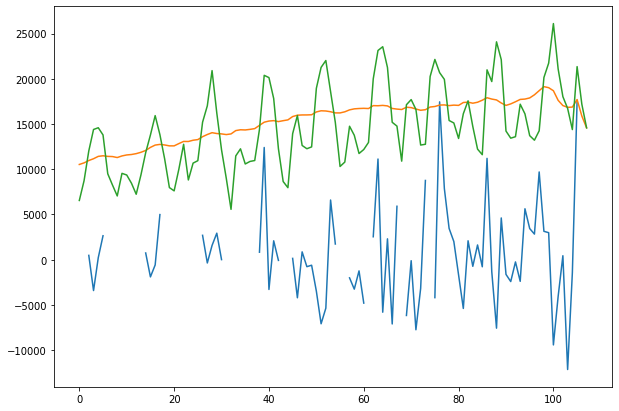

In [211]:
plt.plot(GARCH(a0=model.coef_[0], a1=model.coef_[1], b1=model.coef_[2]))
plt.plot(mn, label='trend')
plt.plot(series_q, label='series')